         Price  Type_Red  Type_RosÃ©  Type_Tawny  Type_White  Grape_0  \
0     0.011764       1.0         0.0         0.0         0.0      0.0   
1     0.025882       0.0         0.0         0.0         1.0      0.0   
2     0.017647       0.0         0.0         0.0         1.0      0.0   
3     0.030588       0.0         0.0         0.0         1.0      0.0   
4     0.025882       1.0         0.0         0.0         0.0      0.0   
...        ...       ...         ...         ...         ...      ...   
960        NaN       1.0         0.0         0.0         0.0      NaN   
962        NaN       1.0         0.0         0.0         0.0      NaN   
1015       NaN       0.0         0.0         0.0         1.0      NaN   
1112       NaN       1.0         0.0         0.0         0.0      NaN   
1239       NaN       0.0         1.0         0.0         0.0      NaN   

      Grape_1  Grape_2  Grape_3  Grape_4  Grape_5  Grape_6  
0         0.0      0.0      0.0      0.0      0.0      1.0  
1

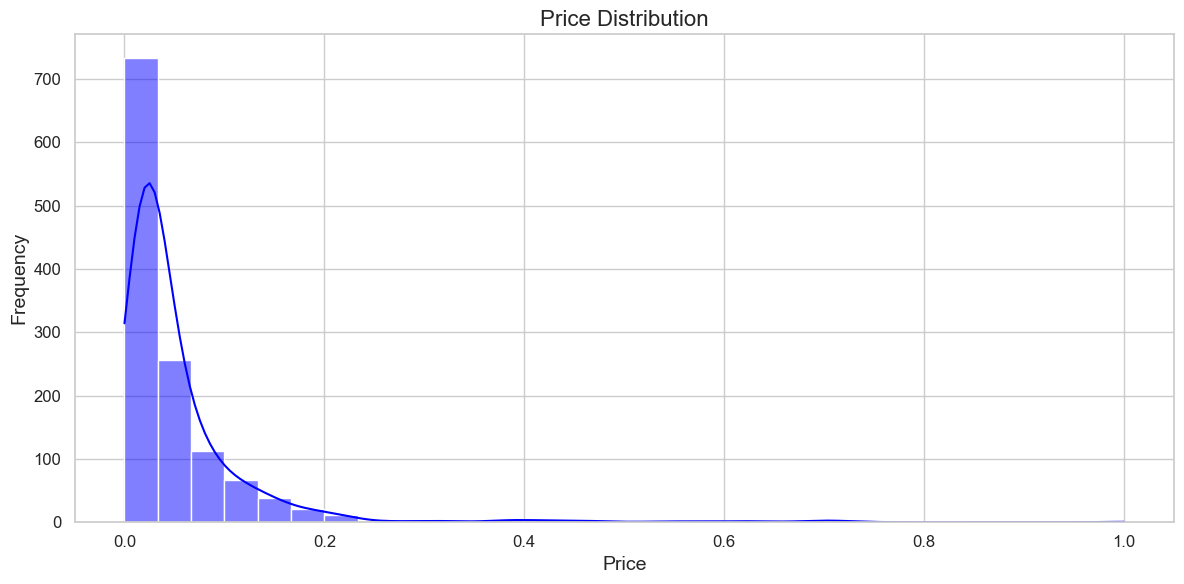

C:\Users\David\AppData\Local\Temp\ipykernel_32096\4255765056.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='cool')


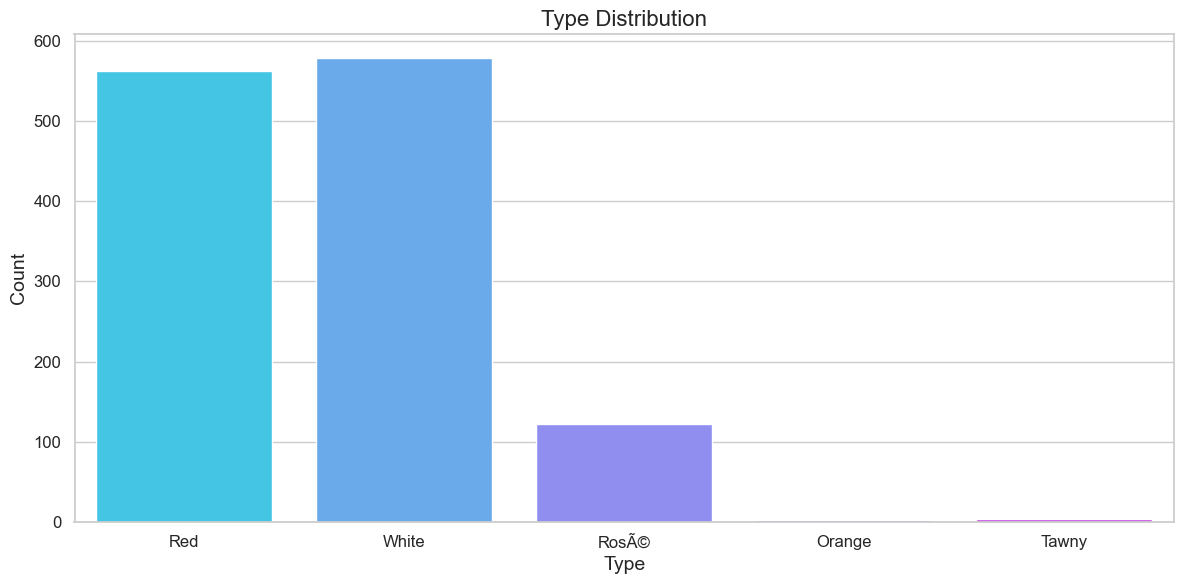

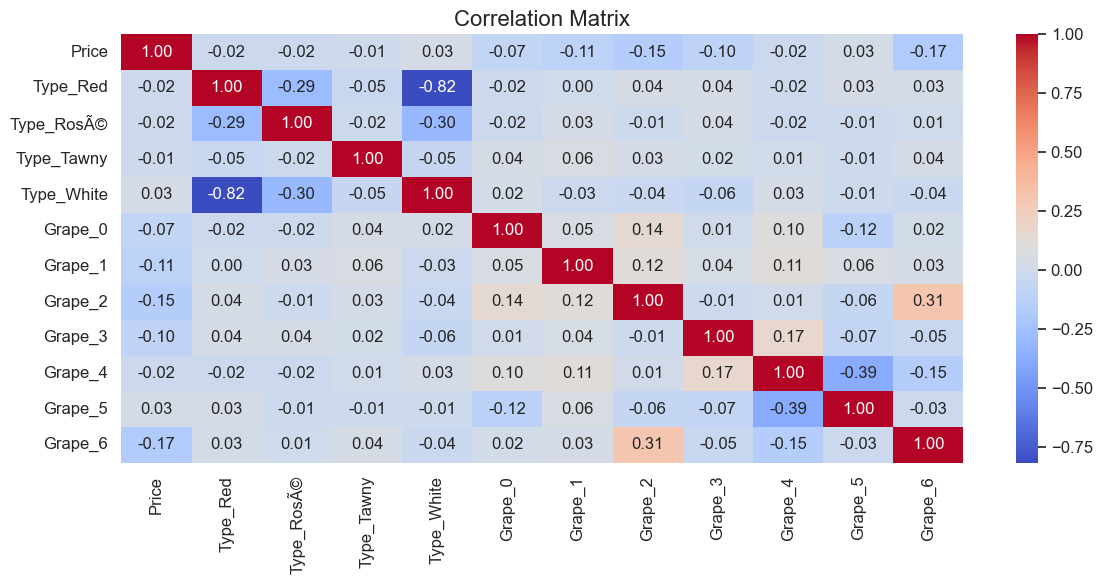

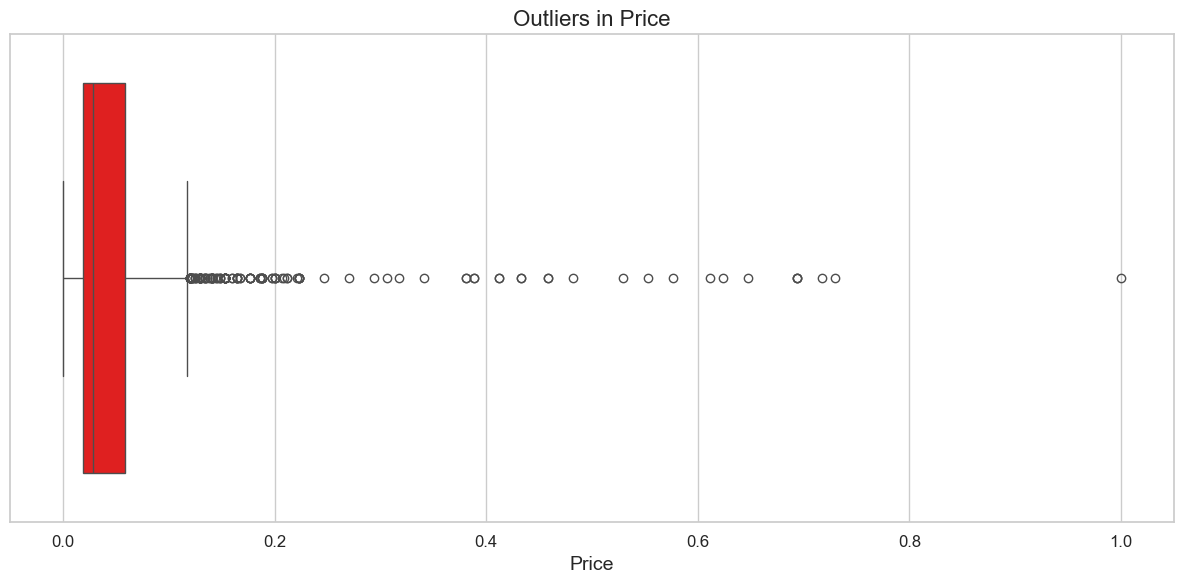

In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Seaborn and Matplotlib configurations for modern aesthetics
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

# Load dataset
df = pd.read_csv('../datasets/WineDataset.csv')

# Select relevant columns
df = df[['Type', 'Grape', 'Price']]

# Clean the 'Price' column by extracting numerical values
df['Price'] = df['Price'].str.replace('Â£', '', regex=False)        
df['Price'] = df['Price'].str.replace('per bottle', '', regex=False) 

# Remover espaços extras e converter para float
df['Price'] = df['Price'].str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with missing or invalid prices
df = df.dropna(subset=['Price'])

# Drop rows with missing values in categorical columns
df = df.dropna(subset=['Type', 'Grape'])


one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['Type']]), columns=one_hot_encoder.get_feature_names_out(['Type']))


scaler = MinMaxScaler()
df['Price'] = scaler.fit_transform(df[['Price']])

# Inicializar o BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Grape'])

# Aplicar a codificação binária
grape_encoded = binary_encoder.fit_transform(df['Grape'])

# Combine all encoded data into a single dataframe
df_encoded = pd.concat([df[['Price']], type_encoded, grape_encoded], axis=1)

df_encoded.dropna()

print(df_encoded)

# Plot distribution of Price
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot Type Distribution
sns.countplot(x='Type', data=df, palette='cool')
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation Matrix Visualization
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Detecting Outliers using Boxplot
sns.boxplot(x=df['Price'], color='red')
plt.title('Outliers in Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()


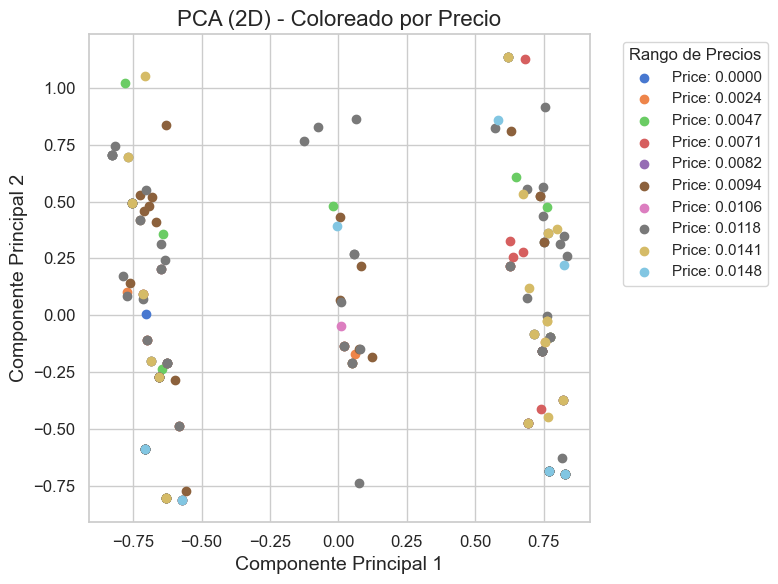

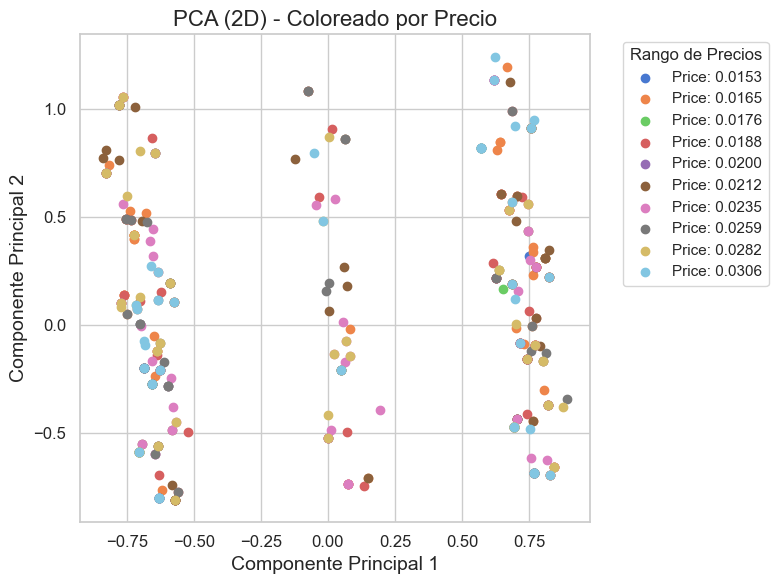

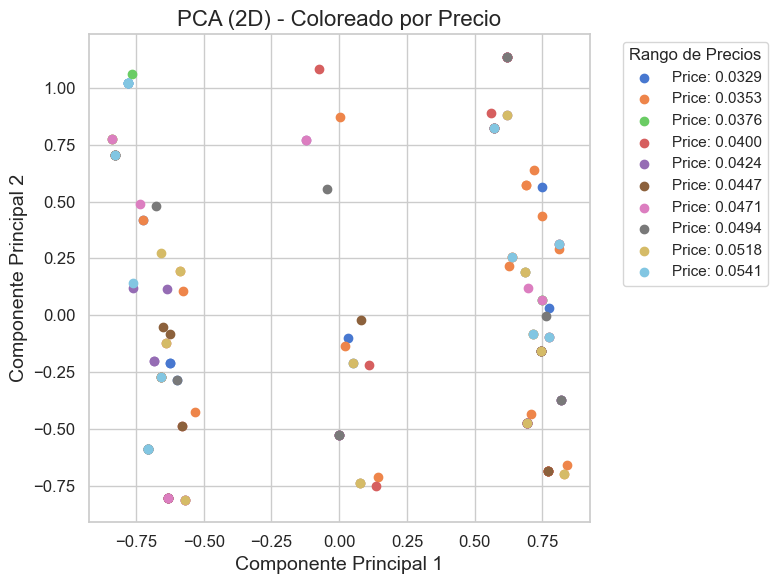

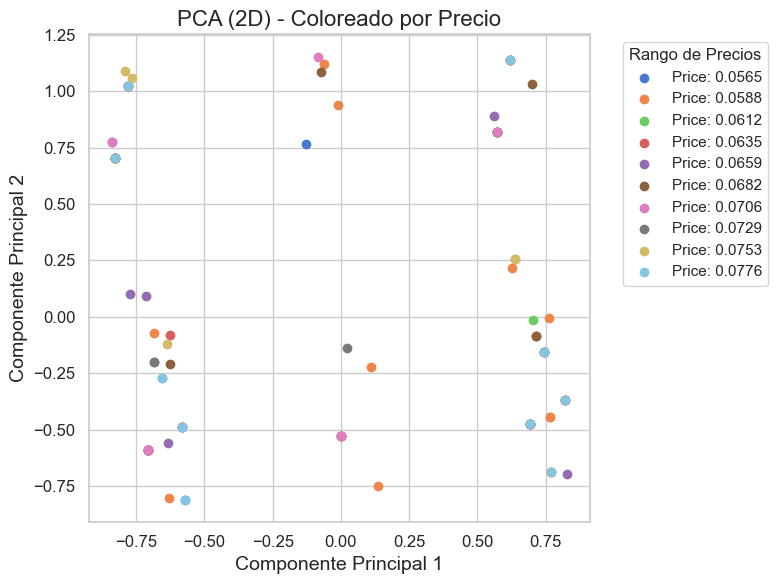

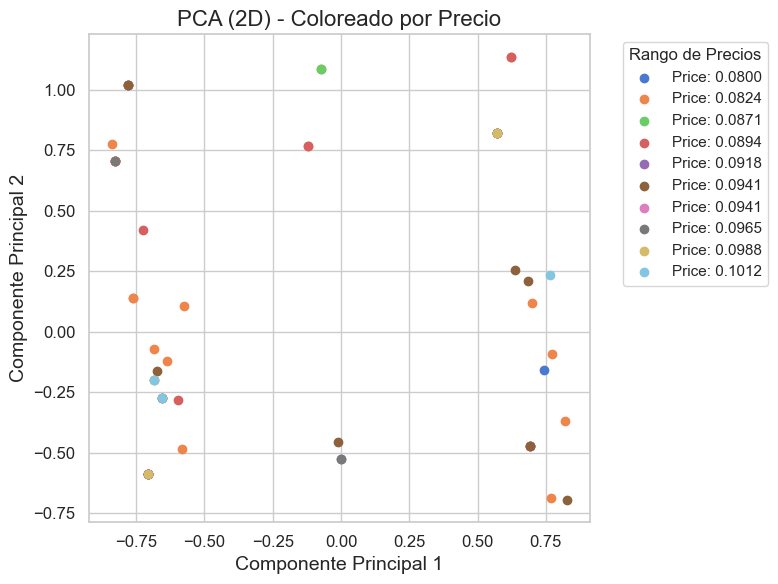

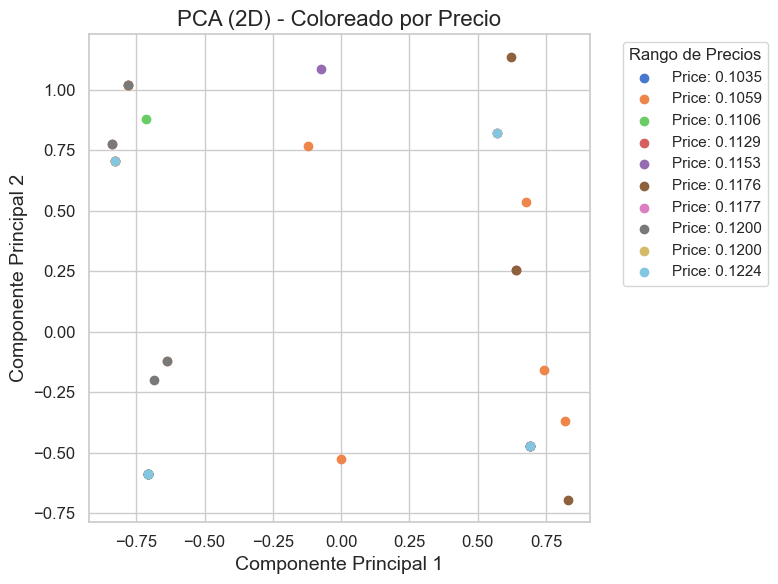

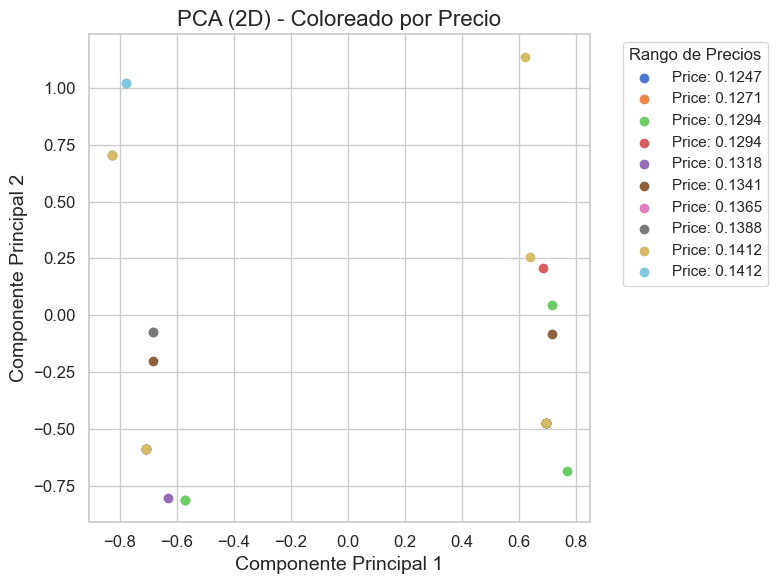

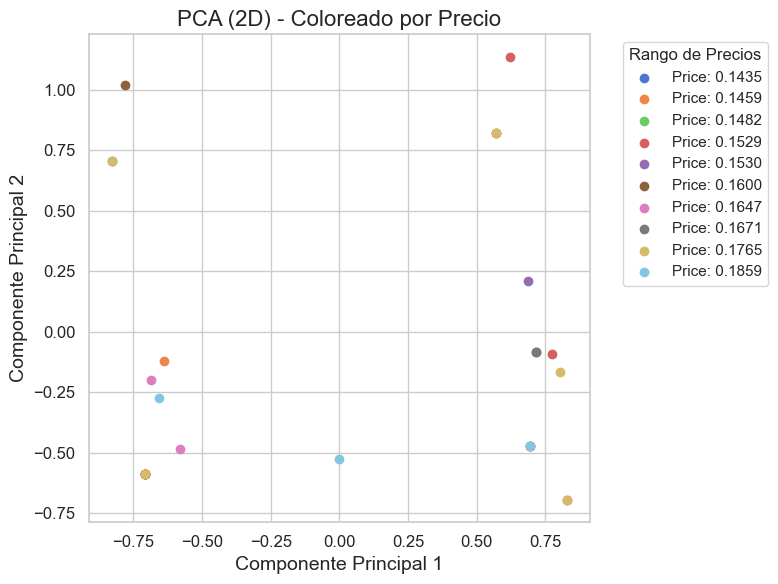

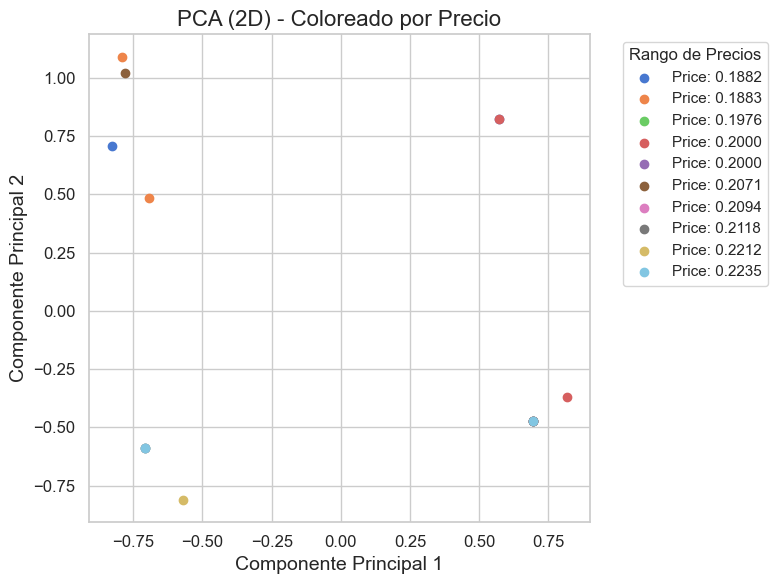

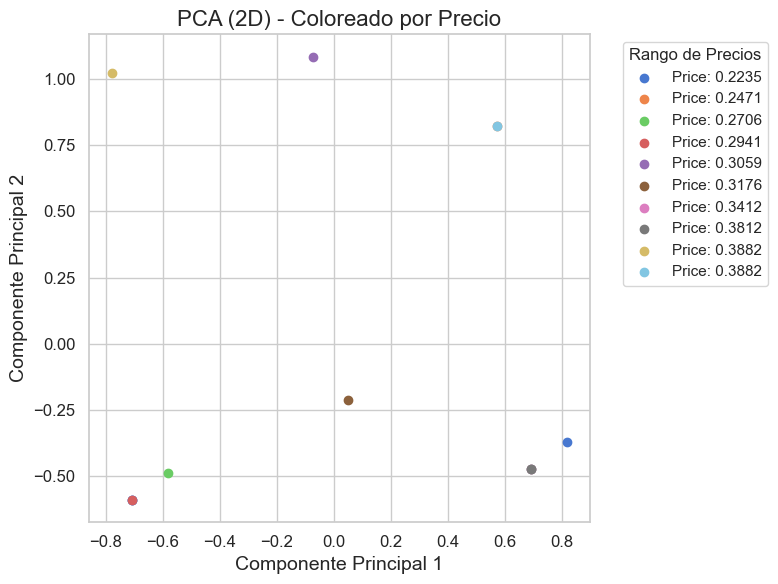

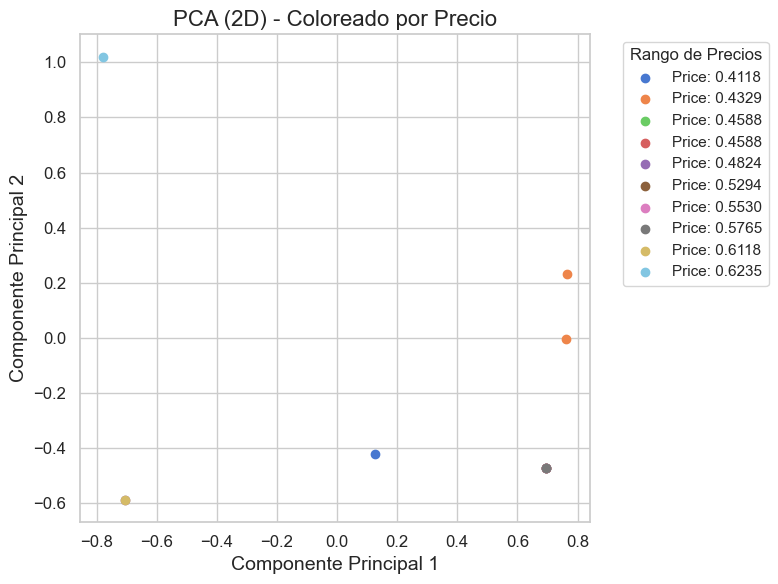

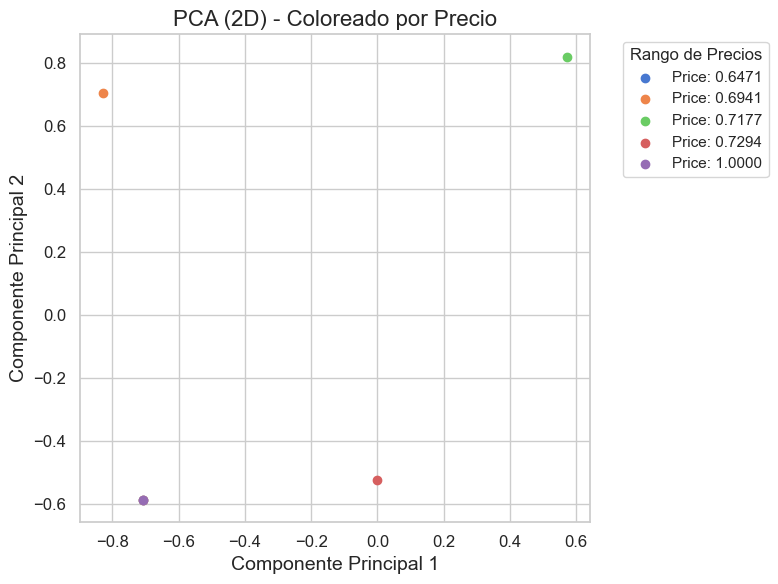

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_encoded_clean = df_encoded.dropna()

# PCA: Preprocesamiento
features = df_encoded_clean.drop(columns=['Price']).values  # Características
labels = df_encoded_clean['Price'].values  # Etiquetas de precio

# PCA con 2 componentes principales
pca = PCA(n_components=2)
df_pca = pca.fit_transform(features)  # Transformación PCA

# Visualización en bloques de 10 valores únicos de etiquetas
unique_labels = np.unique(labels)  # Valores únicos en 'Price'
step = 10  # Cantidad de valores por iteración

figures = []

for i in range(0, len(unique_labels), step):
    plt.figure(figsize=(8, 6))
    subset_labels = unique_labels[i:i + step]  # Subconjunto de etiquetas únicas

    for label in subset_labels:
        plt.scatter(
            df_pca[labels == label, 0],  # Componente principal 1
            df_pca[labels == label, 1],  # Componente principal 2
            label=f'Price: {label:.4f}'  # Etiqueta redondeada
        )

    plt.title('PCA (2D) - Coloreado por Precio')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(title='Rango de Precios', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    figures.append(plt.gcf())
    plt.show()